# テーマは幸福度の高い国は密集しているのか


## まずは経済と幸福度の関係性を調べます

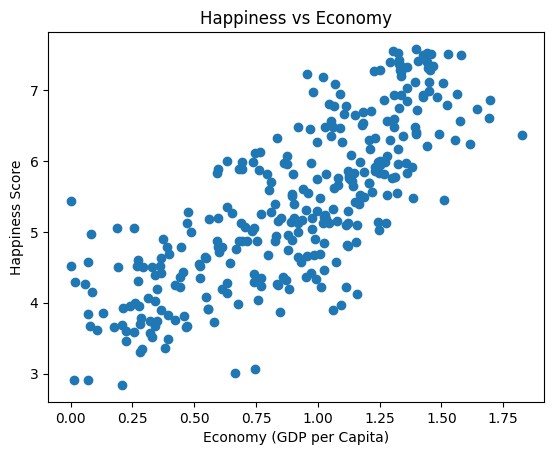

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("world_happiness_report.csv")

plt.figure()
plt.scatter(
    df["Economy (GDP per Capita)"],
    df["Happiness Score"]
)
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.title("Happiness vs Economy")
plt.show()


この図の結果経済力が上がると幸福度が上がることが分かります

### 次に2016年の幸福度ランキングから10位までを見てその周辺の幸福度を調べたいと思います

In [22]:
import pandas as pd

df = pd.read_csv("world_happiness_report.csv")

# 念のため数値型に変換
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["Happiness Rank"] = pd.to_numeric(df["Happiness Rank"], errors="coerce")

# 2016年 & Rank1〜10
top10_2016 = df[
    (df["year"] == 2016) &
    (df["Happiness Rank"] <= 10)
].sort_values("Happiness Rank")

print("幸福度ランキング 上位10か国（2016年）")
print(top10_2016[[
    "Happiness Rank",
    "Country",
    "Region",
    "Happiness Score"
]])


幸福度ランキング 上位10か国（2016年）
     Happiness Rank      Country                     Region  Happiness Score
158             1.0      Denmark             Western Europe            7.526
159             2.0  Switzerland             Western Europe            7.509
160             3.0      Iceland             Western Europe            7.501
161             4.0       Norway             Western Europe            7.498
162             5.0      Finland             Western Europe            7.413
163             6.0       Canada              North America            7.404
164             7.0  Netherlands             Western Europe            7.339
165             8.0  New Zealand  Australia and New Zealand            7.334
166             9.0    Australia  Australia and New Zealand            7.313
167            10.0       Sweden             Western Europe            7.291


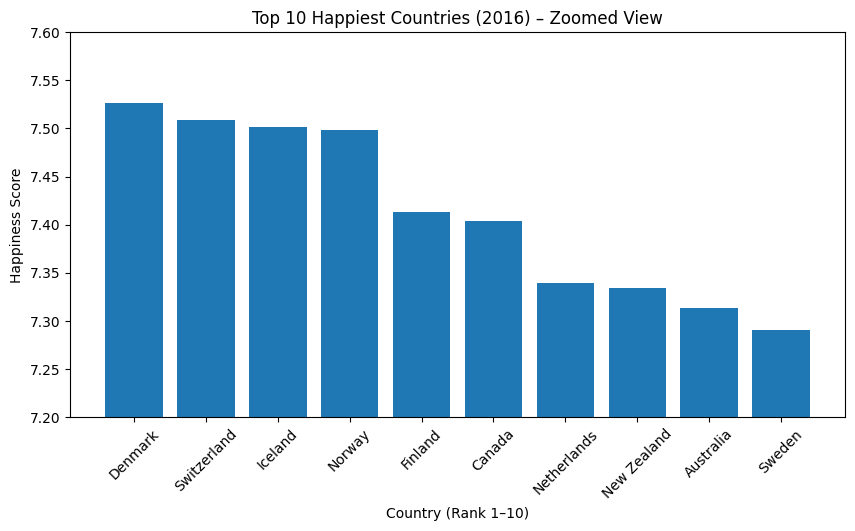

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("world_happiness_report.csv")

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["Happiness Rank"] = pd.to_numeric(df["Happiness Rank"], errors="coerce")

top10_2016 = df[
    (df["year"] == 2016) &
    (df["Happiness Rank"] <= 10)
].sort_values("Happiness Rank")

plt.figure(figsize=(10, 5))
plt.bar(top10_2016["Country"], top10_2016["Happiness Score"])

plt.xlabel("Country (Rank 1–10)")
plt.ylabel("Happiness Score")
plt.title("Top 10 Happiest Countries (2016) – Zoomed View")

# ★ ここが重要
plt.ylim(7.2, 7.6)

plt.xticks(rotation=45)
plt.show()


In [23]:
import pandas as pd

df = pd.read_csv("world_happiness_report.csv")

# 念のため数値型に変換
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# 2016年データ
df_2016 = df[df["year"] == 2016]

# Denmark の隣接国（陸上国境）
denmark_neighbors = ["Germany"]

# 隣接国の幸福度スコア
neighbor_scores = df_2016[
    df_2016["Country"].isin(denmark_neighbors)
]["Happiness Score"]

# 平均
avg_neighbor_happiness = neighbor_scores.mean()

print("2016年 Denmark の隣接国:", denmark_neighbors)
print("隣接国の幸福度平均:", avg_neighbor_happiness)


2016年 Denmark の隣接国: ['Germany']
隣接国の幸福度平均: 6.994


In [24]:
import pandas as pd

df = pd.read_csv("world_happiness_report.csv")

# 数値型に変換（念のため）
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# 2016年のデータ
df_2016 = df[df["year"] == 2016]

# Sweden の隣接国
sweden_neighbors = ["Norway", "Finland"]

# 隣接国の幸福度スコア
neighbor_scores = df_2016[
    df_2016["Country"].isin(sweden_neighbors)
]["Happiness Score"]

# 平均
avg_neighbor_happiness = neighbor_scores.mean()

print("2016年 Sweden の隣接国:", sweden_neighbors)
print("隣接国の幸福度平均:", avg_neighbor_happiness)


2016年 Sweden の隣接国: ['Norway', 'Finland']
隣接国の幸福度平均: 7.455500000000001


### 1位と10位を隣接している国の平均を調べた結果両方高くこの説は正しいと思います最後に最下位の国とその隣接している国を見たいと思います

In [25]:
import pandas as pd

df = pd.read_csv("world_happiness_report.csv")

# 数値型に変換（重要）
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["Happiness Rank"] = pd.to_numeric(df["Happiness Rank"], errors="coerce")

# 2016年のデータ
df_2016 = df[df["year"] == 2016]

# 最下位（Rankが最大）
worst_2016 = df_2016.sort_values(
    by="Happiness Rank",
    ascending=False
).head(1)

print("2016年 幸福度ランキング最下位の国")
print(worst_2016[[
    "Happiness Rank",
    "Country",
    "Region",
    "Happiness Score"
]])


2016年 幸福度ランキング最下位の国
     Happiness Rank  Country              Region  Happiness Score
314           157.0  Burundi  Sub-Saharan Africa            2.905


In [26]:
import pandas as pd

df = pd.read_csv("world_happiness_report.csv")

# 念のため数値型に変換
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# 2016年データ
df_2016 = df[df["year"] == 2016]

# Burundi 隣接国
burundi_neighbors = [
    "Rwanda",
    "Tanzania",
    "Democratic Republic of the Congo"
]

# 隣接国の幸福度スコア
neighbor_scores = df_2016[
    df_2016["Country"].isin(burundi_neighbors)
]["Happiness Score"]

# 平均
avg_neighbor_happiness = neighbor_scores.mean()

print("2016年 Burundi の隣接国:", burundi_neighbors)
print("隣接国の幸福度平均:", avg_neighbor_happiness)


2016年 Burundi の隣接国: ['Rwanda', 'Tanzania', 'Democratic Republic of the Congo']
隣接国の幸福度平均: 3.5905


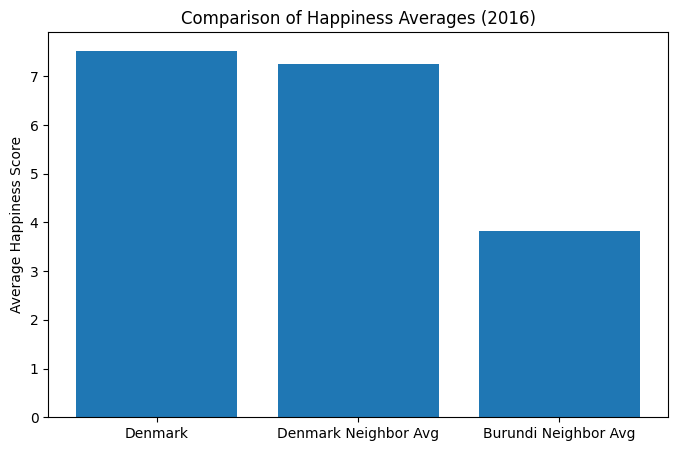

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("world_happiness_report.csv")

df["year"] = pd.to_numeric(df["year"], errors="coerce")

# ===== 2016年データのみ =====
df2016 = df[df["year"] == 2016]

# ===== 対象国 =====
top_country = "Denmark"
top_neighbors = ["Germany", "Sweden", "Norway"]

bottom_country = "Burundi"
bottom_neighbors = ["Rwanda", "Tanzania", "Congo (Kinshasa)"]

# ===== 平均計算 =====
top_score = df2016[df2016["Country"] == top_country]["Happiness Score"].mean()
top_neighbors_mean = df2016[df2016["Country"].isin(top_neighbors)]["Happiness Score"].mean()
bottom_neighbors_mean = df2016[df2016["Country"].isin(bottom_neighbors)]["Happiness Score"].mean()

# ===== 棒グラフ =====
labels = [
    "Denmark",
    "Denmark Neighbor Avg",
    "Burundi Neighbor Avg"
]

values = [
    top_score,
    top_neighbors_mean,
    bottom_neighbors_mean
]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.ylabel("Average Happiness Score")
plt.title("Comparison of Happiness Averages (2016)")
plt.show()


幸福度最下位はブルンジで隣接国の幸福度平均も低い結果となりました。

# 以上の結果から幸福度の高い国は経済力が高く周辺の幸福度も高いことが分かりました。